# Lecture 5, Data science in Neuroscience


## Plan for today

1. Review key machine learning concepts
2. Review of last week's exercise: predictions with our trained model and plot raw data and predictions
3. Introduction to deep neuronal networks (neuron, layer, several layers)
4. Pose estimation using Deeplabcut
5. Using the output of Deeplabcut

***


# Machine learning briefly

* This gives computer the ability to learn without being explicitely programmed (Arthur Samuel, 1959).

## Types

* Prediction versus inference
* Supervised versus unsupervised
* Regression versus classification

These concepts are useful to quickly find the right tool (model) for your problem/task.

## How do computers learn?

Often using an iterative process (i.e. a loop).

1. Feed data to your model
2. Calculate the error (loss).
3. Adjust the model parameters by a small amount to minimize the loss, using gradients.
4. Go back to 1 until the gradients are near 0.


## Our linear regression model

* A simple model with 2 parameters (slope and intercept).
* $Y = wX + b$
* $Y$: target
* $X$: features (inputs)
* $w$ is the slope and $b$ is the intercept.
* We found the best parameters ($w$ and $b$) that minimize a loss function.



***
## Quick review of our linear model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

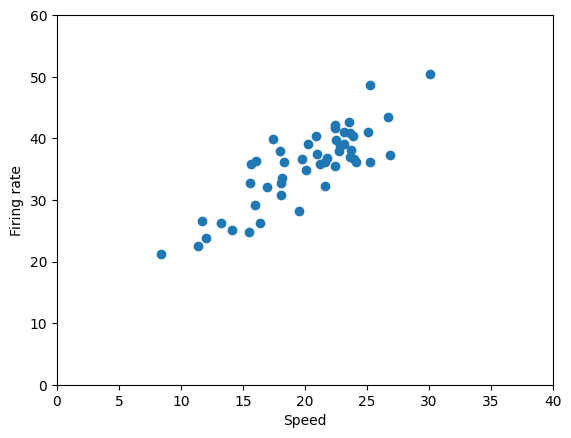

In [2]:
## we simulate speed and firing rate data
w = 1.25 # parameter 2, slope
b = 10 # parameter 1, intercept
size = 50 # how many data points
speed = np.random.normal(loc=20.0, scale=5, size = size) # random numbers taken from a normal distribution
noise = np.random.normal(loc=0.0, scale=3, size = size) # random numbers taken from a normal distribution
rate = speed * w + b + noise # our linear model with some noise
plt.scatter(speed,rate)
plt.xlabel("Speed")
plt.ylabel("Firing rate")
plt.xlim(0,40)
plt.ylim(0,60)
plt.show()

Our **model** was based on matrix multiplication. 

$ \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 & 1 & 1 & 1 \\ speed_0 & speed_1 & speed_2 & speed_3 \end{bmatrix} = \begin{bmatrix} y_0 & y_1 & y_2 & y_3 \end{bmatrix}$

In [3]:
theta = np.array([[50,-0.5]])
print("theta.shape:",theta.shape)

theta.shape: (1, 2)


In [4]:
X = np.ones((2,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row
X[1,:] = speed
print("X.shape:",X.shape)

X.shape: (2, 50)


In [5]:
# our model, we get one output for each input
theta@X

array([[43.96912943, 39.96755218, 38.20972128, 42.93234388, 38.18119322,
        39.10411204, 38.03919552, 37.36528265, 39.49501742, 36.56836878,
        44.15973216, 40.85509246, 41.28324029, 42.01832   , 42.26127153,
        42.20401655, 39.86468767, 45.78710769, 38.06707885, 42.15979156,
        40.94589667, 39.40735267, 39.18245379, 41.82035126, 38.59960688,
        38.77859025, 38.1455225 , 40.91820485, 38.18702122, 40.11195127,
        43.38293849, 38.61010096, 34.95189599, 37.93743778, 37.371442  ,
        40.25468954, 39.54366859, 41.51971945, 38.74459969, 40.94826052,
        36.65282542, 38.43490926, 37.44071761, 38.4080584 , 38.76648573,
        39.18542112, 41.00469418, 38.78745394, 41.99102389, 44.31501908]])

We will initialize our two parameters and see if our model fits the data.

[[50.  -0.5]]


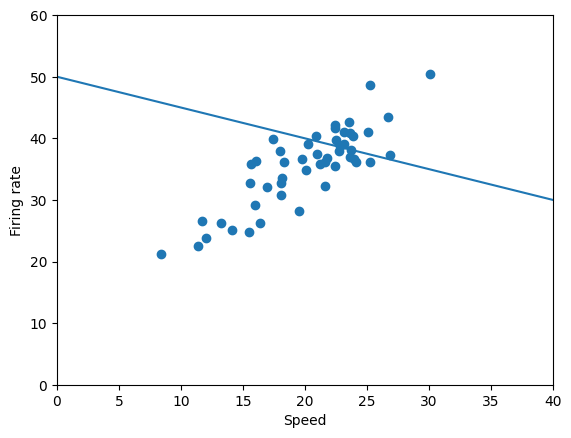

In [6]:
theta = np.array([[50,-0.5]])
print(theta)
xSim = np.linspace(0,40,100)
ySim = xSim*theta[0,1]+theta[0,0]
plt.scatter(speed,rate)
plt.plot(xSim,ySim)
plt.xlabel("Speed")
plt.ylabel("Firing rate")
plt.xlim(0,40)
plt.ylim(0,60)
plt.show()

These parameters were not the best choise.

We can use a training loop to find the best one.

In [14]:
lr = 0.002 # learning rate
n_iterations = 100000 
m = rate.shape[0] # number of data points
rateM = np.expand_dims(rate,0)
theta = np.array([[50,-0.5]]) # set random parameters as a starting point

# learning loop
for iteration in range(n_iterations):

    # model prediction
    yhat = theta@X
    
    # how bad is our model doing, mean square error
    loss = np.mean((rate-yhat)**2)
    
    # calculate the gradients with the current parameters
    gradients = 2/m *(theta@X - rateM) @ X.T
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - lr * gradients
    
    if iteration % 1000 == 0:
        print("epoch {} out of {}, loss: {:.3f}, theta: {}, gradients: {}".format(iteration,n_iterations,loss,theta,gradients))
    
print("optimized theta:",theta)

epoch 0 out of 100000, loss: 88.063, theta: [[49.98230663 -0.72038357]], gradients: [[  8.84668446 110.19178316]]
epoch 1000 out of 100000, loss: 58.998, theta: [[43.38598758 -0.31666389]], gradients: [[ 2.99900901 -0.14198017]]
epoch 2000 out of 100000, loss: 43.979, theta: [[37.92041179 -0.05791062]], gradients: [[ 2.4832919 -0.1175649]]
epoch 3000 out of 100000, loss: 33.682, theta: [[33.39471012  0.15634679]], gradients: [[ 2.05625879 -0.09734815]]
epoch 4000 out of 100000, loss: 26.622, theta: [[29.64725948  0.33375995]], gradients: [[ 1.70265937 -0.08060792]]
epoch 5000 out of 100000, loss: 21.781, theta: [[26.54422986  0.4806647 ]], gradients: [[ 1.40986579 -0.06674638]]
epoch 6000 out of 100000, loss: 18.462, theta: [[23.97480499  0.60230735]], gradients: [[ 1.16742173 -0.0552685 ]]
epoch 7000 out of 100000, loss: 16.186, theta: [[21.84722488  0.70303201]], gradients: [[ 0.96666896 -0.04576439]]
epoch 8000 out of 100000, loss: 14.626, theta: [[20.08550879  0.78643581]], gradien

We can plot the predictions of our model we just trained.

[[11.60245669  1.18804354]]


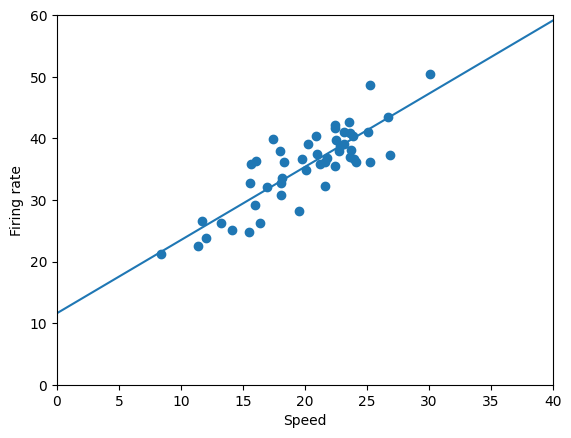

In [15]:
print(theta)
xSim = np.linspace(0,40,100)
ySim = xSim*theta[0,1]+theta[0,0]
plt.scatter(speed,rate)
plt.plot(xSim,ySim)
plt.xlabel("Speed")
plt.ylabel("Firing rate")
plt.xlim(0,40)
plt.ylim(0,60)
plt.show()

* Is this the best fit?
* What did I do wrong? 

*** 
## Deep neural networks

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>




***
## Artificial neuron

A **neuron** is the building block of the neural network.


They do 3 things: 
* A linear transofrmation of the inputs
* Adding a constant 
* Applying a fixed nonlinear function (activation fucntion)
    
The input can be a single value or a vector. The output can be a single value or a vector.

Artificial neurons are not too complicated. We can easily code one to understand how they work.

For simplicity, let's work with a functions that have 1 input and 1 output.

<img src="../images/neuron_linear.png" width="500" align="center">



In [16]:
def linear_function(theta,X):
    """
    Operation done by a simple linear function
    This is not a neuron because the function is linear
    Does w * x + b
    
    Arguments:
    theta: matrix of shape (1,2) containing b and w
    X: matrix of shape (2,-1). First rows are 1, second are the inputs
    """
    return theta@X

In [18]:
X = np.array([[1,1],[0.5,0.03]]) # input
theta = np.array([[2.0,3.5]]) #(bias and w)
predictions = linear_function(theta,X)
print("shapes:", theta.shape,X.shape,predictions.shape)
predictions

shapes: (1, 2) (2, 2) (1, 2)


array([[3.75 , 2.105]])

We can show that this is a linear function by plotting input-output values.

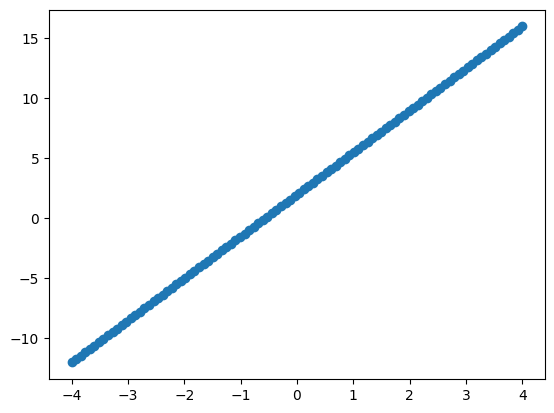

In [19]:
size = 100
X = np.ones((2,size))
X[1,:] = np.linspace(-4.0,4.0,size) # input values ranging from -10 to 10
predictions = linear_function(theta,X)
plt.scatter(X[1,:],predictions[0,:])
plt.show()

A **neuron** is a linear function to which a non-linear function was added. It is called an activation function.


<img src="../images/artificial_neuron.png" width="500" align="center">

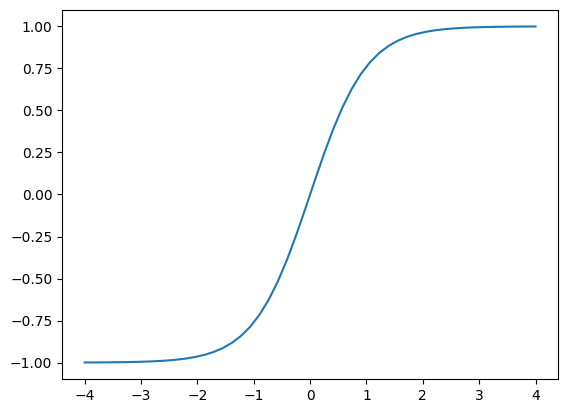

In [20]:
x = np.linspace(-4,4)
plt.plot(x, np.tanh(x))

In [21]:
def neuron_function(theta,X):
    """
    Operation done by a neuron
    Does  tanh(w * x + b)
    
    Arguments:
    theta: matrix of shape (1,2) containing b and w
    X: matrix of shape (2,-1). First rows are 1, second are the inputs
    """
    return np.tanh(theta@X)

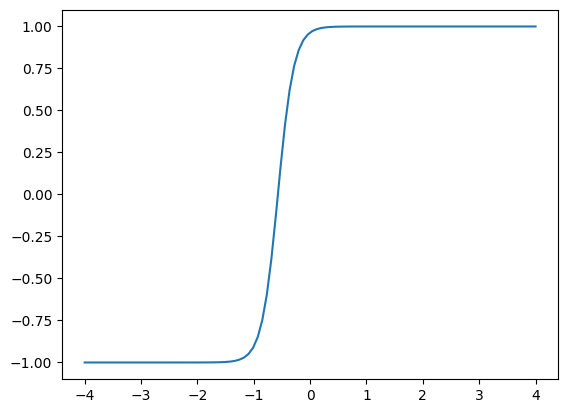

In [22]:
size = 100
X = np.ones((2,size))
X[1,:] = np.linspace(-4.0,4.0,size) # input values ranging from -10 to 10
predictions = neuron_function(theta,X)
plt.plot(X[1,:],predictions[0,:])

### Differences between a linear transformation and artificial neurons

* The transofrmation is not linear.
* The output might be limited to a specific range (e.g., from -1 to 1).
* The neuron will be very sensitive for a specific range of input.
* Summing linear operations result in a linear operation. Summing non-linear operations gives you a much more complex function.

## A layer of neurons

So far we have worked with single neurons.

A layer is just a group of neurons. 

Each neuron in a layer has its own parameters.

<img src="../images/artificial_neuron_layer.png" width="500" align="center">


In [24]:
def neuron_layer_function(theta,X):
    """
    Operation done by a layer of neuron
    Does  tanh(w * x + b) for each neuron
    
    Arguments:
    theta: matrix of shape (variable,2) containing b and w. The 2 columns contains b and w. Each row represents the b and w for one neuron
    X: matrix of shape (2,variable). First rows are 1, second are the inputs
    """
    return np.tanh(theta@X)

We could code a layer of 4 neurons by adding their weight and biases in $theta$.

In [25]:
theta = np.array([[0.3,0.5],[0.4,0.7],[4,0.2],[0.2,0.1]]) #bias and w, for 4 neurons
X = np.array([[1,1],[0.5,0.03]]) # 2 data points
print("X.shape:", X.shape)
print("theta.shape", theta.shape)

predictions = neuron_layer_function(theta,X)
print("predictions.shapes:", predictions.shape)

predictions

X.shape: (2, 2)
theta.shape (4, 2)
predictions.shapes: (4, 2)


array([[0.50052021, 0.30497892],
       [0.63514895, 0.39777254],
       [0.99945084, 0.9993373 ],
       [0.24491866, 0.20025673]])

## A second layer

The output of one layer is passed to the next layer.

In the second layer, a neurons takes the inputs of neurons from layer 1, gives them a respective weight, and add them.

Here is the type of function we can get by adding the output of the first layer neurons.

<img src="../images/artificial_neuron_deep.png" width="500" align="center">



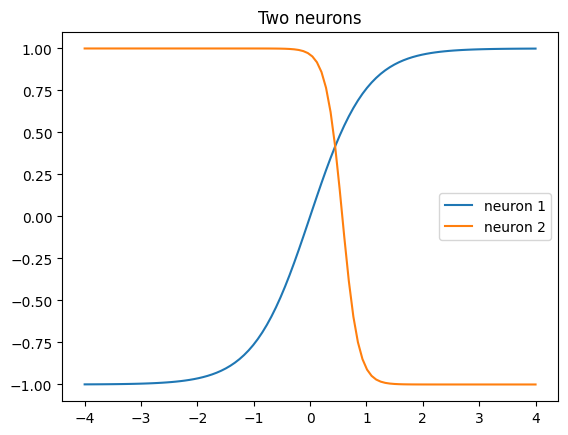

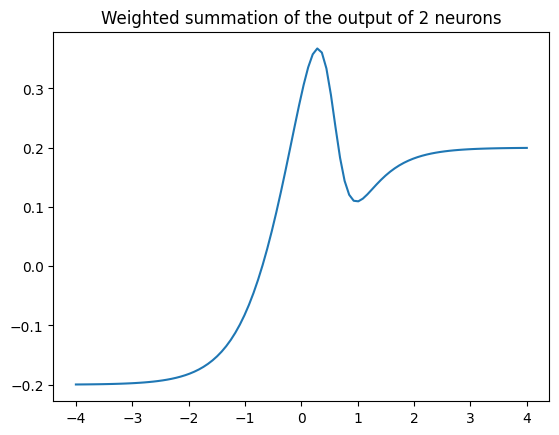

In [26]:
size = 100
X = np.ones((2,size))
X[1,:] = np.linspace(-4.0,4.0,size) # input values ranging from -10 to 10
theta = np.array([[0.0,1.0]]) #(bias and w)
predictions_n1 = neuron_function(theta,X)
plt.plot(X[1,:],predictions_n1[0,:],label="neuron 1")

theta = np.array([[2.0,-3.5]]) #(bias and w)
predictions_n2 = neuron_function(theta,X)
plt.plot(X[1,:],predictions_n2[0,:],label="neuron 2")
plt.legend()
plt.title("Two neurons")
plt.show()

plt.title("Weighted summation of the output of 2 neurons")
plt.plot(X[1,:],(predictions_n1*0.5+predictions_n2*0.3)[0,:])
plt.show()


As you go deeper in a network, the functions can become more complexe.


If you want to build deep neural network, I highly recommend using a [pytorch](https://pytorch.org/) or [tensorflow](https://www.tensorflow.org/).

A good book covering pytorch is [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch) from Eli Stevens, Luca Antiga and Thomas Viehmann

## Convolutional neural networks (CNN)

Date back to 1989 (Yann LeCun). They are great at detecting objects and classifying images. 



<div>
<img src="../images/convolution1.png" width="800"/>
</div>

## One of the first convolutional neural network.

LeCun et al. (1989). Backpropagation applied to handwritten zip code recognition. Neural Computation.

Neurons have receptive fields, similar to what is observed in the visual system.


<div>
<img src="../images/LeNet5.png" width="1200"/>
</div>

## Convolutional Neural Networks as feature detectors


<div>
<img src="../images/imageNet_features_01.png" width="300"/>
</div>


<div>
<img src="../images/imageNet_features_02.png" width="600"/>
</div>



<div>
<img src="../images/imageNet_features_03.png" width="600"/>
</div>

<div>
<img src="../images/imageNet_features_04.png" width="600"/>
</div>



## ImageNet competition: 1.3 million images and 1000 classes

<div>
<img src="../images/imageNetResults.png" width="800"/>
</div>



## Deeplabcut

* A method for 3D markerless pose estimation
* Uses a deep neural network that was pretrained on image classification
* Matches human accuracy, but is much faster
* Based on open-source technologies (python, tensorflow, etc)
* Training with a graphics card or with online services
* Very popular (>5000 followers on Twitter)

Previous alternative: video recordings with markers on the animal.

Deeplabcut is very well documented.

https://www.nature.com/articles/s41593-018-0209-y

http://www.mackenziemathislab.org/deeplabcut

https://www.nature.com/articles/s41596-019-0176-0



<div>
<img src="../images/dlcOverview.png"/>
</div>

***

<div>
<img src="../images/MathisFigure1.png"/>
</div>


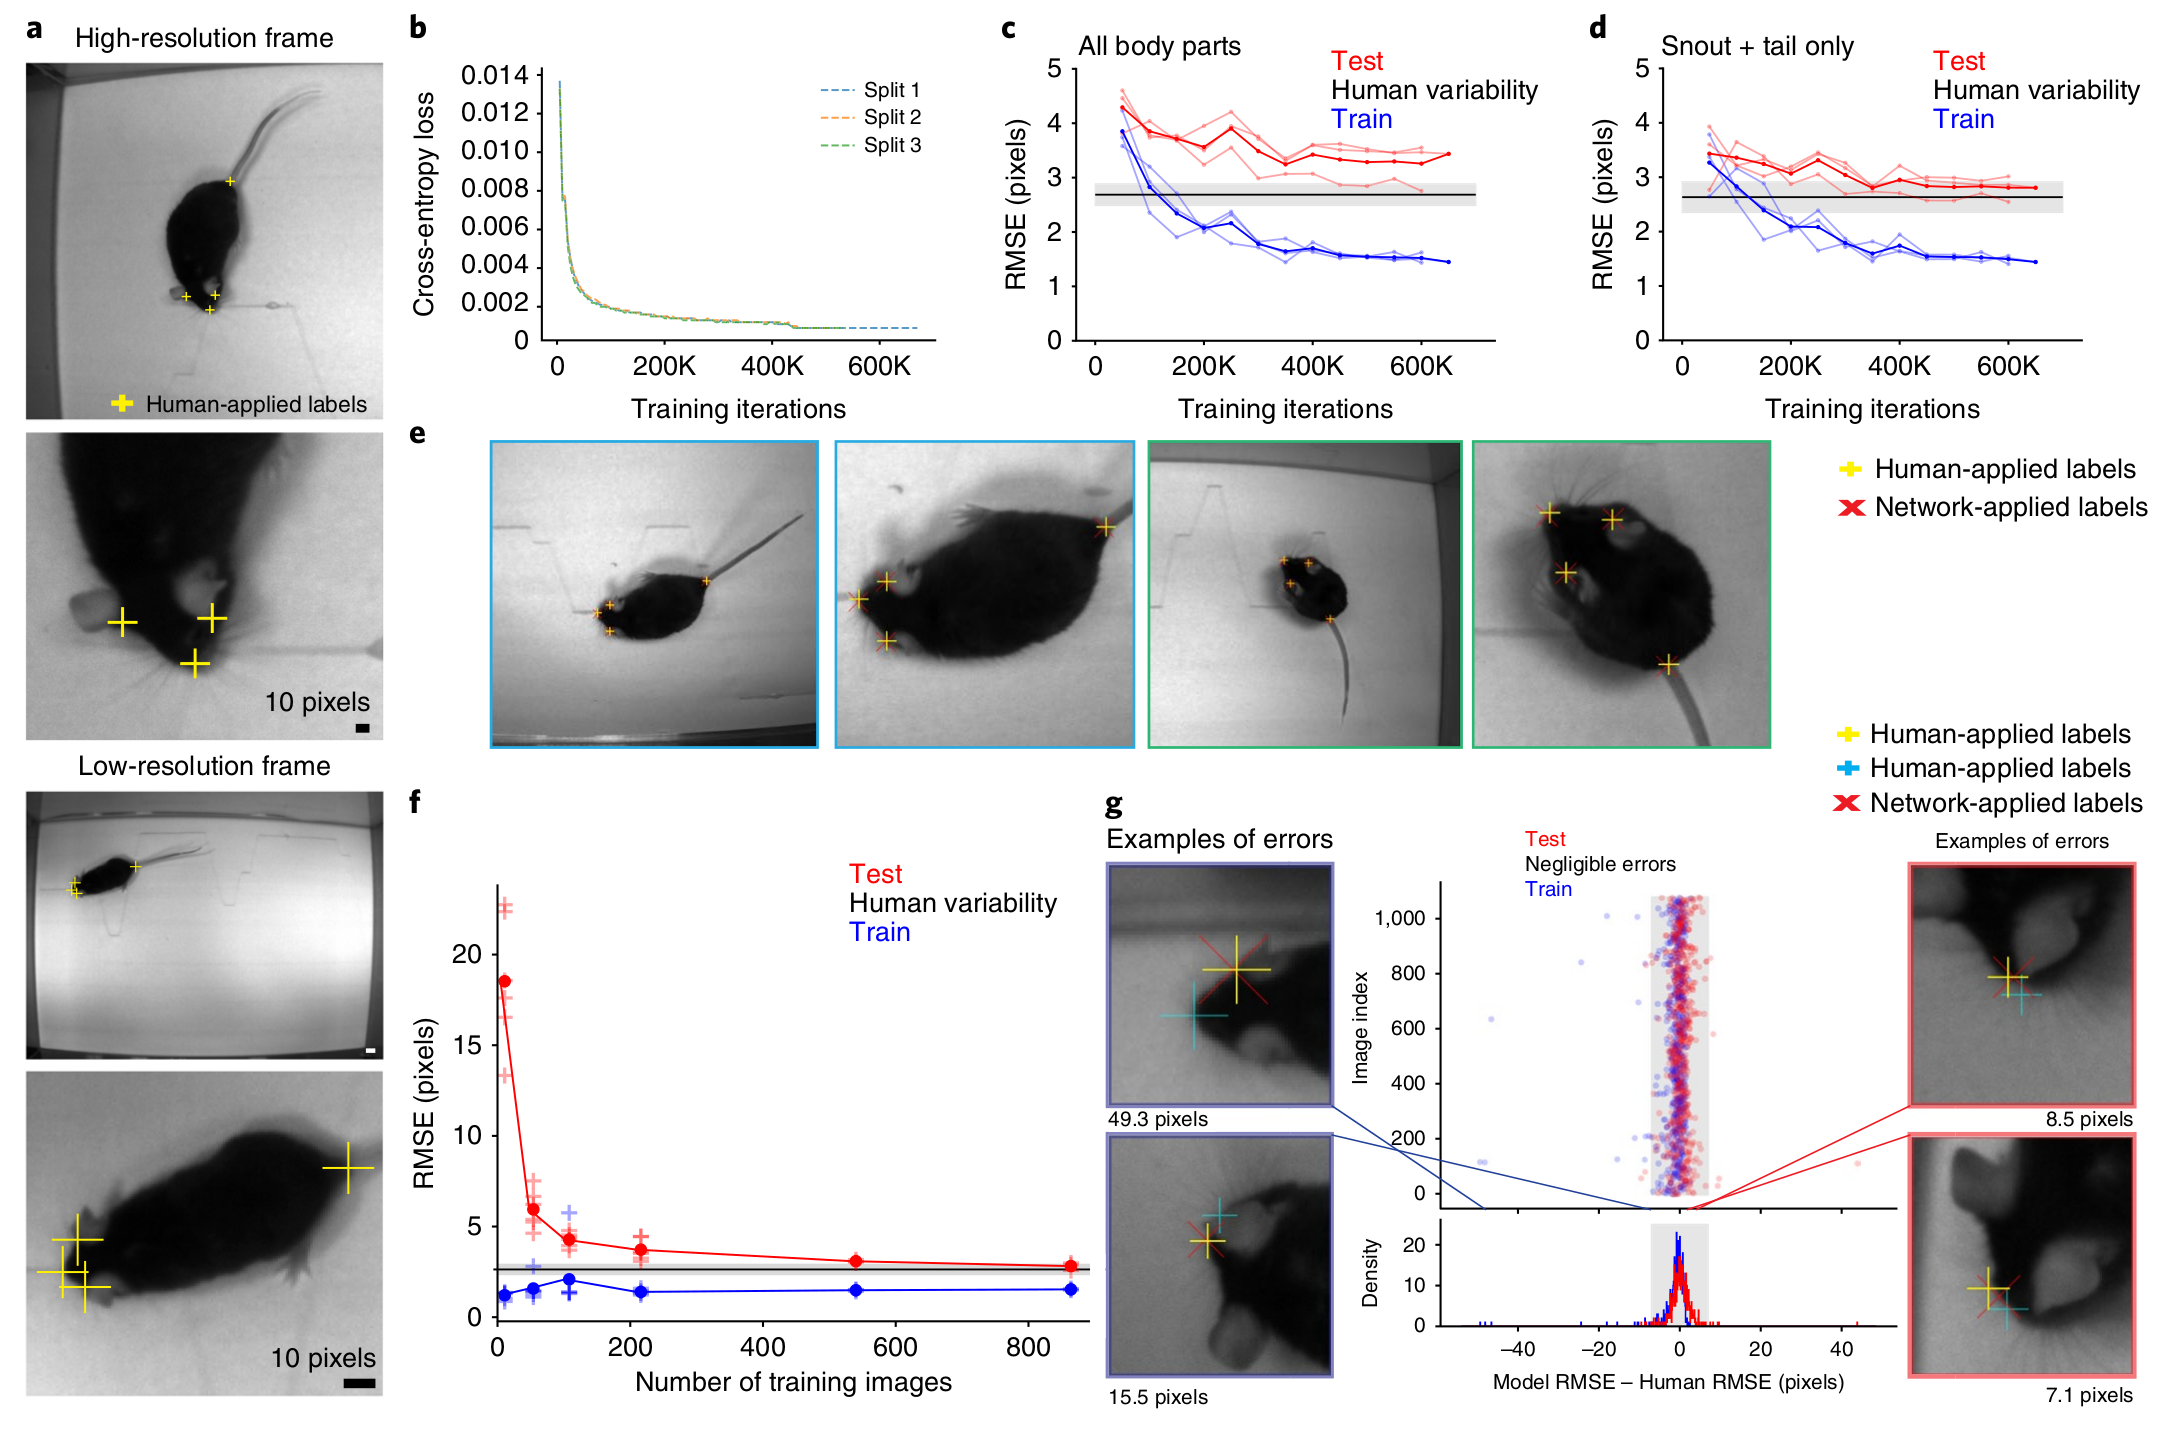***
<div>
<img src="../images/MathisFigure2.png"/>
</div>


## Getting started

I recommend downloading the deeplabcut repository. It contains jupyter notebooks that can be used as examples. They are located in `DeepLabCut/examples/JUPYTER`. To train your network on Google Colab, look in `DeepLabCut/examples/COLAB`

For our purpose, I created 3 notebooks that I saved in `dataNeuroMaster/deeplabcut/`. They are largely based on the examples in the DeepLabCut repository.

* Demo_youowndata.ipynb
* Colab_yourowndata.ipynb
* Use_dlc_output.ipynb